**这份数据是我从kaggle中的dataset里下载的 ， 关于学生的成绩和信息**

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('student-mat.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e4c3a20>,
      dtype=object)

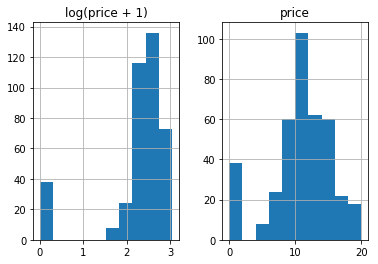

In [2]:
# 先看一下G3长什么样
%matplotlib inline
prices = pd.DataFrame({"price":data["G3"], "log(price + 1)":np.log1p(data["G3"])})
prices.hist()

不需要做平滑化处理

### 其中G1，G2，G3对应三个学期的成绩 ， 我们取平均

In [3]:
y = (data['G3'] + data['G2'] + data['G1']) / 3
data.drop(['G1', 'G2' , 'G3'], axis=1, inplace=True)
y[:3]

0    5.666667
1    5.333333
2    8.333333
dtype: float64

In [4]:
# 查看数据缺失情况
data.isnull().sum().sum()

0

In [5]:
data = data.astype(str)
data.dtypes

school        object
sex           object
age           object
address       object
famsize       object
Pstatus       object
Medu          object
Fedu          object
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime    object
studytime     object
failures      object
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel        object
freetime      object
goout         object
Dalc          object
Walc          object
health        object
absences      object
dtype: object

In [6]:
# 进行one-hot
data_onehot = pd.get_dummies(data)
data_onehot.head()

,school_GP,school_MS,sex_F,sex_M,age_15,age_16,age_17,age_18,age_19,age_20,...,absences_4,absences_40,absences_5,absences_54,absences_56,absences_6,absences_7,absences_75,absences_8,absences_9
0,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
# 划分数据集
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(data_onehot , y)

## 建立模型

In [8]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
ridge = Ridge(10)
params = [1, 10, 15, 20, 25, 30, 40]
test_scores = []
for param in params:
    clf = BaggingRegressor(n_estimators=param, base_estimator=ridge)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


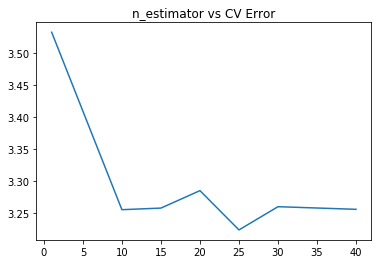

In [9]:
# 可视化错误比例
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, test_scores)
plt.title("n_estimator vs CV Error");